In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from torch import optim
import matplotlib as mpl
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('data.csv')
sc = StandardScaler()
features = df[["CNT","Si3N4","SPEED","DEPTH"]]
df_new = sc.fit_transform(features)

C:\Users\Dell\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


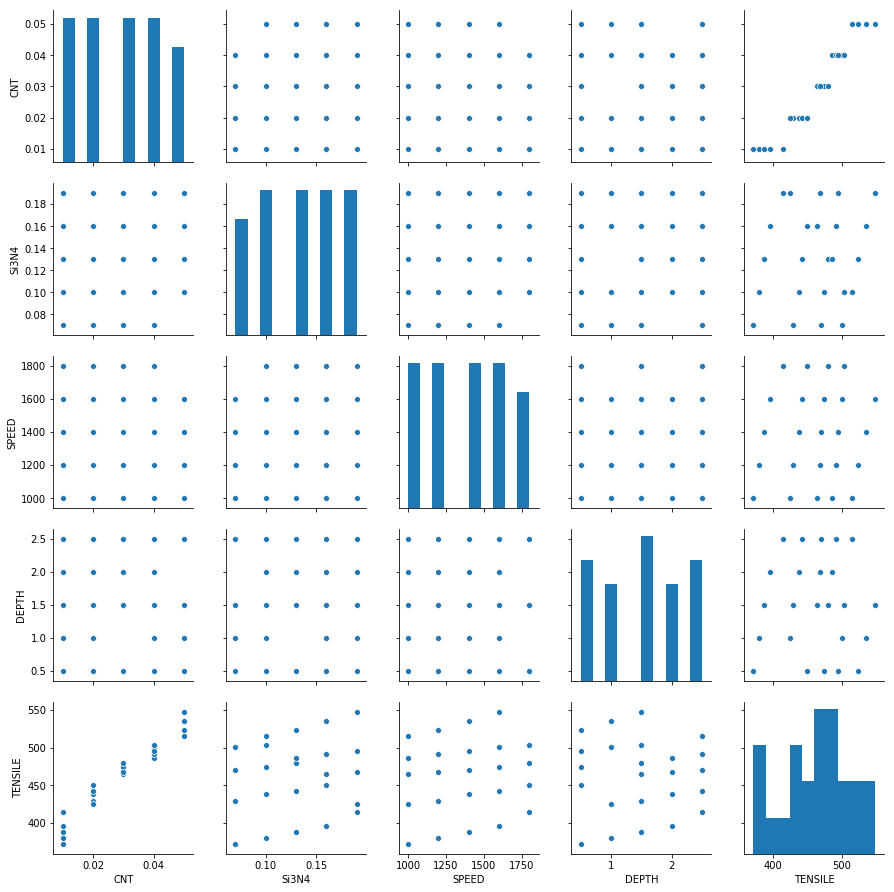

In [31]:
sns.pairplot(df)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_new, df[["TENSILE"]], test_size=0.15, random_state=42)

## Neural Network

In [33]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train.to_numpy())

In [34]:
model = nn.Sequential(nn.Linear(4, 3),
                      nn.Linear(3,2),
                      nn.Linear(2, 1))

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.00003)

x = []
y = []
epochs = 150
for e in range(epochs):
    running_loss = 0
    optimizer.zero_grad()
    output = model(x_train.float())
    loss = criterion(output, y_train.float())
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print(f"Training loss: {running_loss/len(x_train)}")
    if(e % 1 == 0):
        x.append(e)
        y.append(running_loss/len(x_train))

Training loss: 10905.5328125
Training loss: 10902.89375
Training loss: 10900.17265625
Training loss: 10897.35859375
Training loss: 10894.44375
Training loss: 10891.41640625
Training loss: 10888.2625
Training loss: 10884.97109375
Training loss: 10881.52734375
Training loss: 10877.91484375
Training loss: 10874.1171875
Training loss: 10870.1125
Training loss: 10865.87734375
Training loss: 10861.3875
Training loss: 10856.6140625
Training loss: 10851.52734375
Training loss: 10846.0875
Training loss: 10840.25234375
Training loss: 10833.97890625
Training loss: 10827.2046875
Training loss: 10819.87265625
Training loss: 10811.90390625
Training loss: 10803.2140625
Training loss: 10793.7015625
Training loss: 10783.24609375
Training loss: 10771.70859375
Training loss: 10758.925
Training loss: 10744.6859375
Training loss: 10728.7578125
Training loss: 10710.84375
Training loss: 10690.5875
Training loss: 10667.55390625
Training loss: 10641.19765625
Training loss: 10610.8453125
Training loss: 10575.64

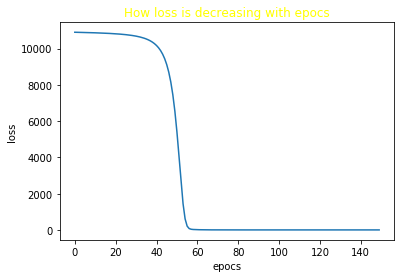

In [35]:
mpl.rcParams['text.color'] = 'yellow'
plt.title("How loss is decreasing with epocs") 
plt.xlabel("epocs") 
plt.ylabel("loss") 
plt.plot(x,y) 
plt.show()

In [36]:
x_test = torch.from_numpy(x_test)
with torch.no_grad():
    y_pred = model(x_test.float())

tensor([[418.1719],
        [514.2424],
        [377.2077],
        [497.8774]])


In [24]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

7.0363922119140625

In [37]:
def predict_nn(f):
    f = torch.from_numpy(f)
    with torch.no_grad():
        pred = model(f.float())    
    return pred

## sklearn models

In [38]:
df_new = pd.DataFrame(df_new)
x_train, x_test, y_train, y_test = train_test_split(df_new, df[["TENSILE"]], test_size=0.15, random_state=42)
model1 = xgb.XGBRegressor()
model2 = AdaBoostRegressor()
model3 = RandomForestRegressor(max_depth=3, random_state=0)
model4 = DecisionTreeRegressor(max_depth=3)
model5 = LinearRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

[12:02:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Dell\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)
y_nn = y_pred
print("model 1 = ",y_pred1)
print("model 2 = ",y_pred2)
print("model 3 = ",y_pred3)
print("model 4 = ",y_pred4)
print("model 5 = ",y_pred5)
print("neural network = ",y_nn)

model 1 =  [433.33432 502.83044 379.31418 491.11874]
model 2 =  [441. 495. 384. 495.]
model 3 =  [434.         488.675      392.95666667 487.575     ]
model 4 =  [446.5 494.  388.  494. ]
model 5 =  [[418.17481848]
 [514.24026246]
 [377.21036949]
 [497.87713656]]
neural network =  tensor([[418.1719],
        [514.2424],
        [377.2077],
        [497.8774]])


In [41]:
a = float(input())
b = float(input())
c = float(input())
d = float(input())

f = np.array([[a,b,c,d]])
f = sc.transform(f)
print(predict(f))
f = pd.DataFrame(f)
print(model1.predict(f))
print(model2.predict(f))
print(model3.predict(f))
print(model4.predict(f))
print(model5.predict(f))

0.05
0.1
1100
2.3
tensor([[526.4199]])
[519.47626]
[519.5]
[515.95]
[519.5]
[[526.41896036]]


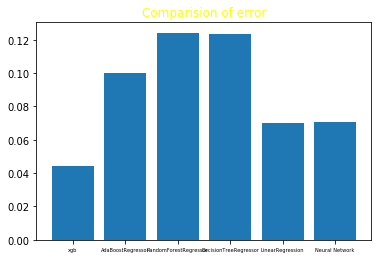

In [42]:
a = (metrics.mean_absolute_error(y_test,y_pred1))
b = (metrics.mean_absolute_error(y_test,y_pred2))
c = (metrics.mean_absolute_error(y_test,y_pred3))
d = (metrics.mean_absolute_error(y_test,y_pred4))
e = (metrics.mean_absolute_error(y_test,y_pred5))
f = (metrics.mean_absolute_error(y_test,y_pred))

l = [a/100,b/100,c/100,d/100,e/100,f/100]
label = ['xgb','AdaBoostRegressor','RandomForestRegressor','DecisionTreeRegressor','LinearRegression','Neural Network']
index = np.arange(len(label))
plt.bar(index, l)
plt.title("Comparision of error")
plt.xticks(index, label, fontsize=5)
plt.show()